In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms  
from utils.VAR_CNN import VarCNN
from utils.trainingloop import train_model
from utils.dataprep import create_dataloaders
device = "cuda" if torch.cuda.is_available() else "cpu"


data_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
train_dir = 'model_data/train'
test_dir = 'model_data/test'
model = VarCNN()
batch_size = 64

train_dataloader,test_dataloader,class_names = create_dataloaders(
    train_dir=train_dir, test_dir=test_dir, transform=data_transform,batch_size=batch_size
)

results = train_model(model,train_dataloader,test_dataloader)


Epoch [1/50], Train Loss: 0.6961, Train Acc: 0.4984, Test Loss: 0.6947, Test Acc: 0.4938
EarlyStopping counter: 0 out of 10
Epoch [2/50], Train Loss: 0.6955, Train Acc: 0.5036, Test Loss: 0.6925, Test Acc: 0.5062
EarlyStopping counter: 0 out of 10
Epoch [3/50], Train Loss: 0.7002, Train Acc: 0.4912, Test Loss: 0.6926, Test Acc: 0.4938
EarlyStopping counter: 1 out of 10
Epoch [4/50], Train Loss: 0.6918, Train Acc: 0.5223, Test Loss: 0.6856, Test Acc: 0.5104
EarlyStopping counter: 0 out of 10
Epoch [5/50], Train Loss: 0.6665, Train Acc: 0.5639, Test Loss: 0.6360, Test Acc: 0.6307
EarlyStopping counter: 0 out of 10
Epoch [6/50], Train Loss: 0.6429, Train Acc: 0.6241, Test Loss: 0.6440, Test Acc: 0.6141
EarlyStopping counter: 1 out of 10
Epoch [7/50], Train Loss: 0.6504, Train Acc: 0.6158, Test Loss: 0.6199, Test Acc: 0.6432
EarlyStopping counter: 0 out of 10
Epoch [8/50], Train Loss: 0.6178, Train Acc: 0.6293, Test Loss: 0.5979, Test Acc: 0.6846
EarlyStopping counter: 0 out of 10
Epoch [9

In [2]:
torch.save(model.state_dict(), 'model/model_file.pth')

In [3]:
import matplotlib.pyplot as plt
from typing import Dict, List

def plot_loss_curves(results: Dict[str, List[float]]):
    loss = results['train_loss']
    test_loss = results['test_loss']

    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

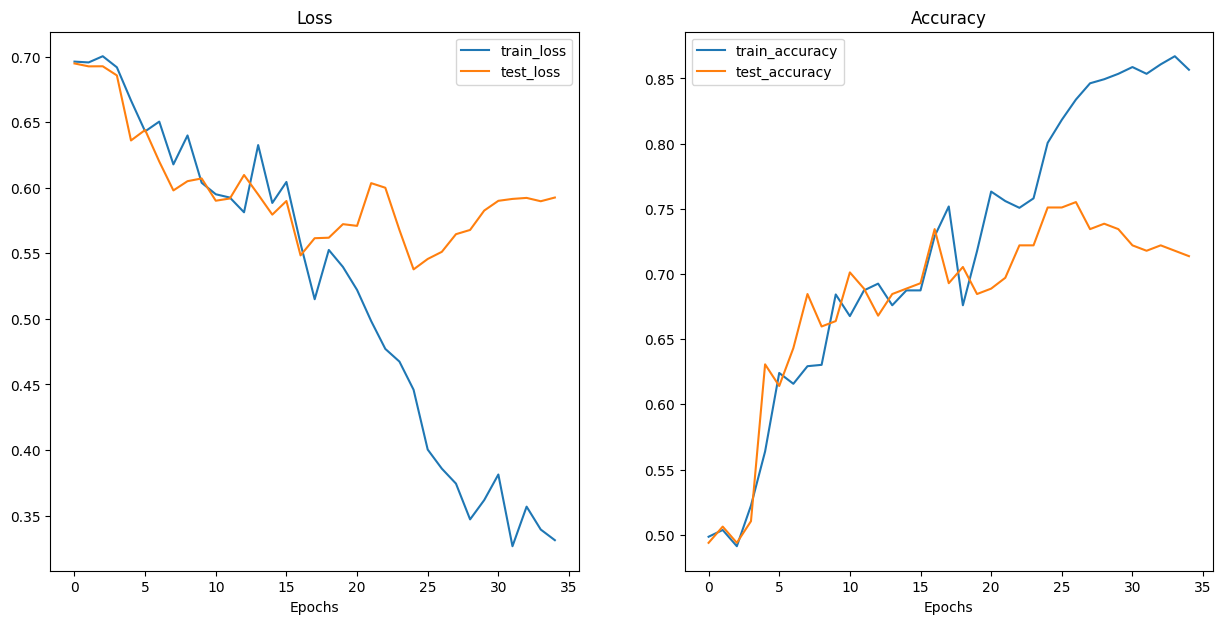

In [4]:
plot_loss_curves(results)

In [38]:
import torch
from torchvision import transforms
from PIL import Image

# Load the trained model
model = VarCNN()
model.load_state_dict(torch.load('model/model_file.pth'))
model.eval()

# Define image transformation
data_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Preprocess new images
image_paths = ['random_data/02.jpg',
 'random_data/06.jpg',
 'random_data/14.jpg',
 'random_data/22.jpg',
 'random_data/23.jpg',
 'random_data/25.jpg',
 'random_data/29.jpg',
 'random_data/108.jpg',
 'random_data/111.jpg',
 'random_data/117.jpg',
 'random_data/127.jpg',
 'random_data/129.jpg',
 'random_data/133.jpg',
 'random_data/140.jpg',
 'random_data/144.jpg',
 'random_data/146.jpg',
 'random_data/147.jpg',
 'random_data/saliba.jpeg']
preprocessed_images = [data_transform(Image.open(img_path)).unsqueeze(0) for img_path in image_paths]

# Make predictions
with torch.no_grad():
    model.eval()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    preprocessed_images = [img.to(device) for img in preprocessed_images]
    predictions = [(model(img) >= 0.5).item() for img in preprocessed_images]

# Convert predictions to class labels
class_labels = ["clean tackles" if pred == 0 else "foul" for pred in predictions]

# Print the results
for img_path, label in zip(image_paths, class_labels):
    print(f"Image: {img_path}, Predicted Class: {label}")

Image: random_data/02.jpg, Predicted Class: foul
Image: random_data/06.jpg, Predicted Class: foul
Image: random_data/14.jpg, Predicted Class: foul
Image: random_data/22.jpg, Predicted Class: foul
Image: random_data/23.jpg, Predicted Class: clean tackles
Image: random_data/25.jpg, Predicted Class: clean tackles
Image: random_data/29.jpg, Predicted Class: clean tackles
Image: random_data/108.jpg, Predicted Class: clean tackles
Image: random_data/111.jpg, Predicted Class: clean tackles
Image: random_data/117.jpg, Predicted Class: clean tackles
Image: random_data/127.jpg, Predicted Class: clean tackles
Image: random_data/129.jpg, Predicted Class: clean tackles
Image: random_data/133.jpg, Predicted Class: clean tackles
Image: random_data/140.jpg, Predicted Class: clean tackles
Image: random_data/144.jpg, Predicted Class: foul
Image: random_data/146.jpg, Predicted Class: clean tackles
Image: random_data/147.jpg, Predicted Class: foul
Image: random_data/saliba.jpeg, Predicted Class: clean tac